# **Crafting Strategic Insights In Restaurant Ratings - Level 2**

## **Importing Necessary Libraries and importing dataset**

In [2]:
# Install pandasql
!pip install pandasql
import pandasql as psql

# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


  Preparing metadata (setup.py) ... done
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26772 sha256=e38e8dfd4be9c1a95a4e369614c627850da07851e158555ec62bb8c0fa1ac3ee
  Stored in directory: /root/.cache/pip/wheels/e9/bc/3a/8434bdcccf5779e72894a9b24fecbdcaf97940607eaf4bcdf9
Successfully built pandasql


## Read the CSV file

In [3]:
# Upload the CSV file manually in Colab first
# Then read the CSV file into a pandas DataFrame
url= "https://raw.githubusercontent.com/LeelaYathapu/Cognifyz-Restaurant-Service-Analysis/refs/heads/main/Cleaned_Dataset.csv"
df = pd.read_csv(url)

# Display the first few rows of the DataFrame
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


# Task 1: Restaurant Ratings
1. Analyze the distribution of aggregate
ratings and determine the most common
rating range.

2. Calculate the average number of votes
received by restaurants.

In [4]:
# Write SQL query and run it in DataFrame

# SQL query to Analyze the distribution of aggregate ratings and determine the most common rating range.
query1 = """
SELECT
    CASE
        WHEN "Aggregate rating" BETWEEN 0 AND 1 THEN '0-1'
        WHEN "Aggregate rating" BETWEEN 1 AND 2 THEN '1-2'
        WHEN "Aggregate rating" BETWEEN 2 AND 3 THEN '2-3'
        WHEN "Aggregate rating" BETWEEN 3 AND 4 THEN '3-4'
        WHEN "Aggregate rating" BETWEEN 4 AND 5 THEN '4-5'
        ELSE 'No rating'
    END AS rating_range,
    COUNT(*) AS rating_count
FROM
    df
GROUP BY
    rating_range
ORDER BY
    rating_count DESC
    LIMIT 1;
"""

# Execute the SQL query
common_rating_range = psql.sqldf(query1, locals())

# Show the result
print(common_rating_range)

  rating_range  rating_count
0          3-4          4381


**Observation**

The distribution of Aggregate rating lies in the range from 2 - 5.

The most common rating range is 3-4, rating count 4381.

In [5]:
# SQL query to Calculate the average number of votes received by restaurants.
query1 = """
SELECT
    "Restaurant ID",
    AVG("Votes") AS avg_votes

FROM
    df
    GROUP BY "Restaurant ID"
    order by avg_votes desc
    ;
"""
# Execute the SQL query
avg_votes = psql.sqldf(query1, locals())

# Show the result
print(avg_votes)


      Restaurant ID  avg_votes
0             51705    10934.0
1             51040     9667.0
2            308322     7931.0
3             20404     7574.0
4             56618     6907.0
...             ...        ...
9537           7362        0.0
9538           6678        0.0
9539           6249        0.0
9540           5927        0.0
9541           5463        0.0

[9542 rows x 2 columns]


**Observation**

The average number of votes received by restaurants : 156.77.

The average number of highest votes received by the restaurants is Toit having approx 10934 Votes.

Few restaurants have No rating, like Arunachal Bhawan, Front Food Corner, Alam Biryani, Right for Night, Food Hut.

# Task 2: Cuisine Combination

1. Identify the most common combinations of
cuisines in the dataset.

2. Determine if certain cuisine combinations
tend to have higher ratings.

In [6]:
# SQL query to Identify the most common combinations of cuisines in the dataset.
query1 = """
SELECT Cuisines, COUNT(*) AS cuisines_count
FROM df
GROUP BY Cuisines
ORDER BY cuisines_count DESC
;
"""
# Execute the SQL query
top_city = psql.sqldf(query1, locals())

# Show the result
print(top_city)

                                       Cuisines  cuisines_count
0                                  North Indian             936
1                         North Indian, Chinese             511
2                                     Fast Food             354
3                                       Chinese             354
4                         North Indian, Mughlai             334
...                                         ...             ...
1820                        African, Portuguese               1
1821                                    African               1
1822  Afghani, North Indian, Pakistani, Arabian               1
1823                      Afghani, North Indian               1
1824                  Afghani, Mughlai, Chinese               1

[1825 rows x 2 columns]


**Observation:**

The most common combinations of cuisines are 'North Indian, Chinese' having 511 count according to the datasets.

In [9]:
# SQL query to Determine if certain cuisine combinations tend to have higher ratings.
query1 = """
SELECT Cuisines, "Aggregate rating", COUNT(*) AS cuisines_count
FROM df
WHERE "Aggregate rating" = (SELECT MAX("Aggregate rating") FROM df);
"""

# Execute the SQL query
avg_rating = psql.sqldf(query1, locals())

# Show the result
print(avg_rating)

          Cuisines  Aggregate rating  cuisines_count
0  Japanese, Sushi               4.9              61


**Observation:**

The higest rating is 4.9 .

The total number of cuisines having higest rating are 61.

Out of 61 , 17 restaurants are consider as a cuisines combination category.

# Task 3: Geographic Analysis

1. Plot the locations of restaurants on a
map using longitude and latitude
coordinates.

2. Identify any patterns or clusters of
restaurants in specific areas.

In [ ]:
!pip install folium

In [ ]:
#Plot the locations of restaurants on a map using longitude and latitude coordinates.
import folium

# Create a folium map centered at an arbitrary location
map_center = [df1['Latitude'].loc[0], df1['Longitude'].iloc[0]]
my_map = folium.Map(location=map_center, zoom_start=12)

# Add markers for each restaurant
for _, restaurant in df1.iterrows():
    folium.Marker( location=[restaurant['Latitude'], restaurant['Longitude']],
                  popup=restaurant['Restaurant Name'] ).add_to(my_map)

# Save the map to an HTML file or display it
my_map.save("restaurant_map.html")
# my_map.show()  # Uncomment this line to display the map in a Jupyter Notebook


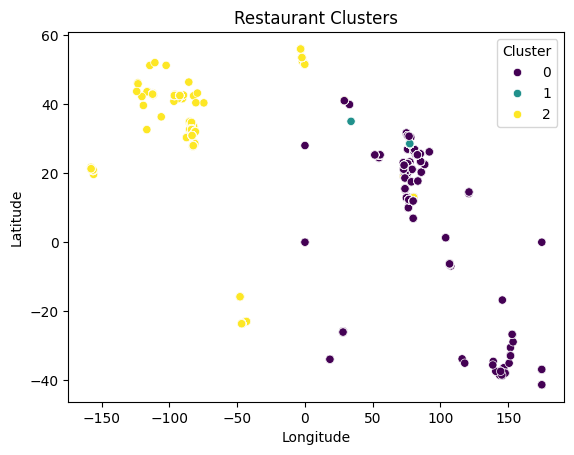

In [18]:
#Identify any patterns or clusters of restaurants in specific areas.
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

features = df[['Longitude','Latitude', 'Price range','Aggregate rating', 'Votes']]

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

#apply k-means Clustering
kmeans = KMeans (n_clusters = 3, random_state = 42)
df['Cluster']= kmeans.fit_predict(features_scaled)

#Use seaborn to visualization
sns.scatterplot(x='Longitude', y='Latitude', hue='Cluster', data=df, palette='viridis')
plt.title('Restaurant Clusters')
plt.show()

**Observation**

The scatter plot with different colors represents spatial clusters of restaurants. The certain areas have a higher concentration of restaurants.

It identifying that clusters with a lower density of restaurants might suggest areas where opening a new restaurant could be a strategic move.

# Task 4: Task: Restaurant Chains

1. Identify if there are any restaurant chains
present in the dataset.

2. Analyze the ratings and popularity of
different restaurant chains.

In [9]:
# SQL query to identify if there are any restaurant chains present in the dataset.
query1 = """

SELECT
    "Restaurant Name",
    COUNT(*) AS chain_count
FROM
    df
GROUP BY
    "Restaurant Name"
HAVING
    COUNT(*) > 1
ORDER BY
    chain_count DESC
    ;
"""

# Execute the SQL query
restaurant_chains = psql.sqldf(query1, locals())

# Show the result
print(restaurant_chains)

        Restaurant Name  chain_count
0       Cafe Coffee Day           83
1        Domino's Pizza           79
2                Subway           63
3      Green Chick Chop           51
4            McDonald's           48
..                  ...          ...
729    A Piece of Paris            2
730        6 Pack Momos            2
731      4700BC Popcorn            2
732  34 Parkstreet Lane            2
733   10 Downing Street            2

[734 rows x 2 columns]


**Observation**

There are 734 restuarant chain are present.

In [15]:
# SQL query to Analyze the ratings and popularity of different restaurant chains.
query1 = """
SELECT
    "Restaurant Name",
    COUNT(*) AS chain_count,
    AVG("Aggregate rating") AS avg_rating,
    AVG("Votes") AS avg_votes
FROM
    df
GROUP BY
    "Restaurant Name"
HAVING
    COUNT(*) > 1
ORDER BY
    avg_rating DESC
    ;
"""

# Execute the SQL query
popularity = psql.sqldf(query1, locals())

# Show the result
print(popularity)

               Restaurant Name  chain_count  avg_rating  avg_votes
0             Talaga Sampireun            3       4.900     1838.0
1             Silantro Fil-Mex            2       4.850      682.0
2      AB's Absolute Barbecues            2       4.850     1575.5
3    AB's - Absolute Barbecues            4       4.825     3350.0
4           Naturals Ice Cream            2       4.800     1547.0
..                         ...          ...         ...        ...
729                Big Biryani            2       0.000        0.5
730               Bake Walkers            2       0.000        0.0
731               Anand Sweets            2       0.000        1.5
732      Aggarwal Sweet Centre            3       0.000        2.0
733              Aap Ki Khatir            2       0.000        0.0

[734 rows x 4 columns]


**Summary**

Total 734 number of restaurant chain are found.

Average Rating: These chains are likely to be popular among customers and may have a reputation for providing excellent dining experiences.

Popularity Based on Votes: Higher total votes suggest greater popularity and may indicate that a chain is frequently visited by customers.